In [313]:
import math
import numpy as np
from matplotlib import pyplot as plt
import sys
import random

np.random.seed(19680801)
plt.rcParams["figure.autolayout"] = True

In [133]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

In [189]:
f_1 = lambda x: x**3
a_1 = 0
b_1 = 1

f_2 = lambda x: abs(x - 0.2)
a_2 = 0
b_2 = 1

f_3 = lambda x: x * np.sin(1 / x)
a_3 = 0.01
b_3 = 1

f_list = [f_1, f_2, f_3]

In [257]:
def exhaustive_search(func, a, b, e = 0.001):
    optim_point = Point(math.inf, math.inf)
    
    n = int((b - a) / e)
    step = (b - a) / n
    
    for k in range(0, n):
        x_k = a + k * step
        y_k = func(x_k)
        
        if optim_point.y > y_k:
            optim_point = Point(x_k, y_k)
    
    iter_count = n
    f_calc_count = n

    return optim_point, iter_count, f_calc_count

In [258]:
def dichotomy(func, a, b, e = 0.001):
    sigma = random.uniform(0, e)
    
    iter_count = 0
    f_calc_count = 0
    
    while abs(a - b) > e:
        iter_count += 1
        f_calc_count += 2
        
        x1 = (a + b - sigma) / 2
        x2 = (a + b + sigma) / 2
        
        f_x1 = func(x1)
        f_x2 = func(x2)
        
        if(f_x1 <= f_x2):
            b = x2
        else:
            a = x1
            
    min_x = (a + b) / 2
    min_y = (f_x1 + f_x2)  / 2
    optim_point = Point(min_x, min_y)
    
    return optim_point, iter_count, f_calc_count

In [301]:
def golden_section(func, a, b, e = 0.001):
    iter_count = 0
    f_calc_count = 2
    
    delta = (3 - math.sqrt(5))  * (b - a) / 2
            
    x1 = a + delta
    x2 = b - delta
    
    f_x1 = func(x1)
    f_x2 = func(x2)
    
    flag = 0
    
    while abs(a - b) >= e:
        #print(f' a: {a}\n b: {b}\n x1: {x1}\n x2: {x2}\n f1: {f_x1}\n f2: {f_x2}\n')
        iter_count += 1
        f_calc_count += 1
        
        if(f_x1 <= f_x2):
            b = x2
            x2 = x1
            
            delta = ((3 - math.sqrt(5)) / 2) * (b - a)
            x1 = a + delta   
            
            f_x2 = f_x1
            f_x1 = func(x1)
        else:
            a = x1
            x1 = x2
            
            delta = ((3 - math.sqrt(5)) / 2) * (b - a)
            x2 = b - delta
            
            f_x1 = f_x2
            f_x2 = func(x2)
            
    min_x = (a + b) / 2
    min_y = (f_x1 + f_x2)  / 2
    optim_point = Point(min_x, min_y)
    
    return optim_point, iter_count, f_calc_count

methods_list = [exhaustive_search, dichotomy, golden_section]

In [302]:
point, n, m = golden_section(f_2, 0, 1)
print(point.x, point.y)

0.2000733137435857 8.653513585611672e-05


In [303]:
marks = ['s', '^', 'o']
def plot_func_and_optimal_point(func, methods_and_points, a, b, func_name):
    fig, ax = plt.subplots(len(methods_and_points), figsize=(6, 10))
    
    fig.suptitle(func_name)
    
    x = np.linspace(a, b, num=100)

    for idx, (method, marker) in enumerate(zip(methods_and_points,marks)):
        ax[idx].plot(x, func(x))
        optim_point = methods_and_points[method]
        
        ax[idx].plot(optim_point.x, optim_point.y,
            marker=marker, label=method)
        
        ax[idx].text(optim_point.x, optim_point.y + 0.05,
             '({0:0.2f}, {1:0.2f})'.format(optim_point.x, optim_point.y,))
    
        ax[idx].set(xlabel='x', ylabel='y')
    
        ax[idx].legend()
        ax[idx].grid()

    plt.show()

In [304]:
def make_table(table_data,
               row_headers = ['exhaustive_search','dichotomy','golden_sections'],
               column_headers = ['iter_count','f_calc_count']):
    
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table_data,
          rowLabels=row_headers,
          colLabels=column_headers,
             loc='center',
            cellLoc='center')

    plt.show()

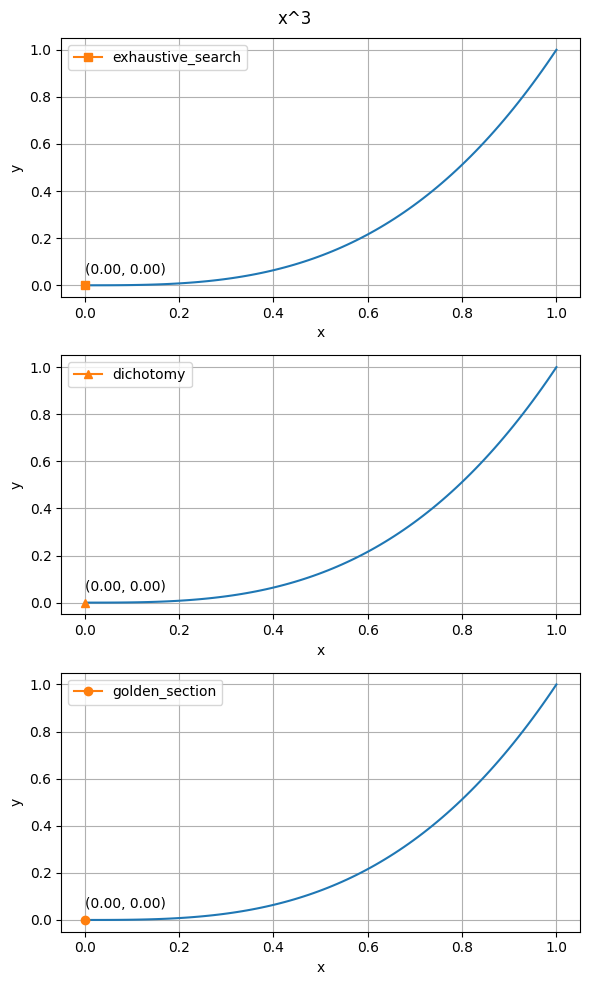

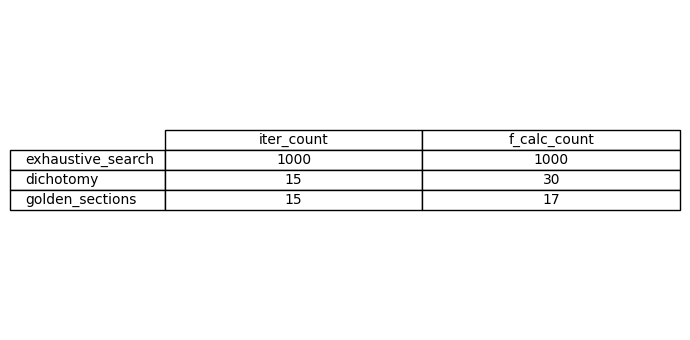

In [305]:
methods_and_points = {}
table_data = []

for m in methods_list:
    optim, iter_count, f_calc_count = m(f_1, a = a_1, b = b_1)
    methods_and_points[m.__name__] = optim
    table_data.append([iter_count, f_calc_count])

plot_func_and_optimal_point(f_1, methods_and_points, a = a_1, b = b_1, func_name = 'x^3')
make_table(table_data)

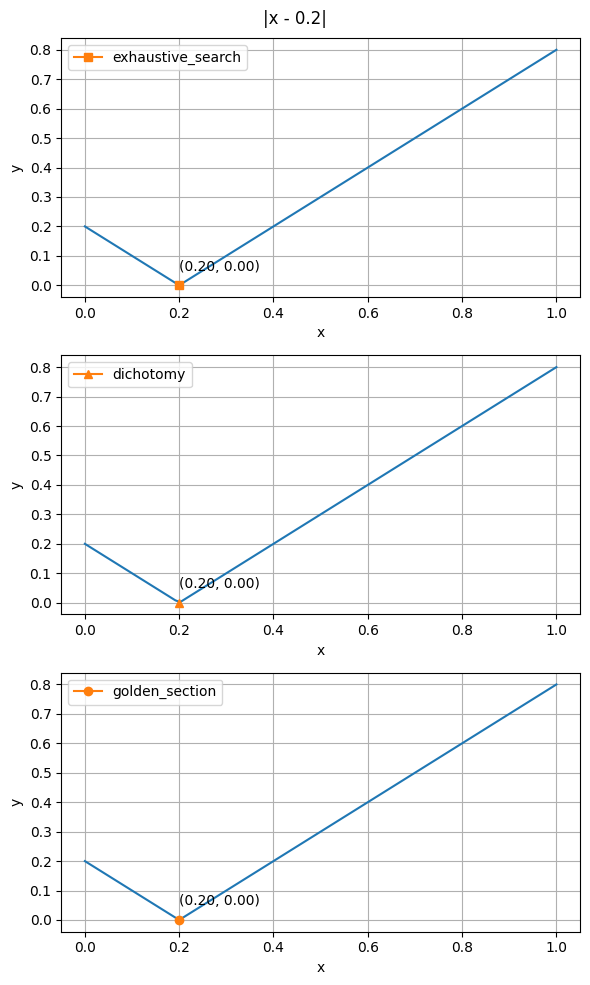

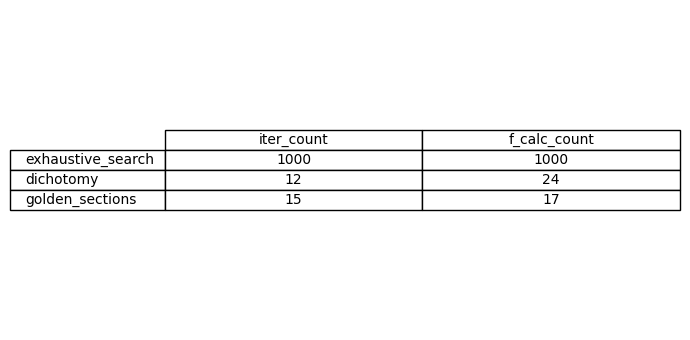

In [306]:
methods_and_points = {}
table_data = []

for m in methods_list:
    optim, iter_count, f_calc_count = m(f_2, a = a_2, b = b_2)
    methods_and_points[m.__name__] = optim
    table_data.append([iter_count, f_calc_count])

plot_func_and_optimal_point(f_2, methods_and_points, a = a_2, b = b_2, func_name = '|x - 0.2|')
make_table(table_data)

In [ ]:
methods_and_points = {}
table_data = []

for m in methods_list:
    optim, iter_count, f_calc_count = m(f_3, a = a_3, b = b_3,)
    methods_and_points[m.__name__] = optim
    table_data.append([iter_count, f_calc_count])

plot_func_and_optimal_point(f_3, methods_and_points, a = a_3, b = b_3, func_name = 'x * sin(1/x)')
make_table(table_data)

# PART ||

## Generate random array

In [309]:
a = random.random()
b = random.random()

print(a, b)

0.7080117921965575 0.6547312245387457


In [329]:
x = np.linspace(0, 1, num=101)
sigma = np.random.normal(0, 1, 101)

y = a*x+b+sigma


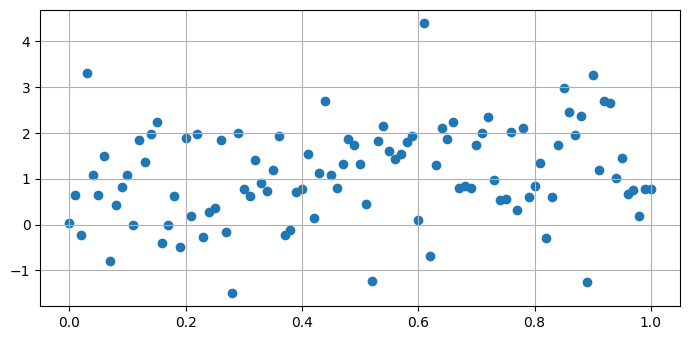

In [330]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.grid(True)
plt.show()

In [ ]:
def linear approximant():
    

def rational approximant():